# Question 01:

Expected Search Cost Table (e):
 0.06  0.28  0.62  1.02  1.34  1.83  2.44  3.12 
        0.06  0.30  0.68  0.93  1.41  1.96  2.61 
               0.06  0.32  0.57  1.04  1.48  2.13 
                      0.06  0.24  0.57  1.01  1.55 
                             0.05  0.30  0.72  1.20 
                                    0.05  0.32  0.78 
                                           0.05  0.34 
                                                  0.05 

Root Table:
  1   2   2   2   3   3   5 
  0   2   3   3   3   5   5 
  0   0   3   3   4   5   5 
  0   0   0   4   5   5   6 
  0   0   0   0   5   6   6 
  0   0   0   0   0   6   7 
  0   0   0   0   0   0   7 

Optimal Binary Search Tree Structure:
k5 is the root
k2 is the left child of k5
k1 is the left child of k2
d0 is the left child of k1
d1 is the right child of k1
k3 is the right child of k2
d2 is the left child of k3
k4 is the right child of k3
d3 is the left child of k4
d4 is the right child of k4
k7 is the right child of k5
k6 

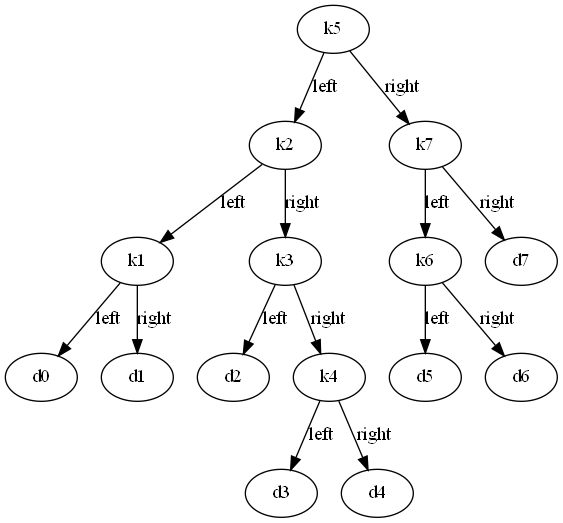

,Node,Depth,Probability,Contribution
0,k5,0,0.10,0.10
1,k2,1,0.06,0.12
2,k1,2,0.04,0.12
3,d0,3,0.06,0.24
4,d1,3,0.06,0.24
5,k3,2,0.08,0.24
6,d2,3,0.06,0.24
7,k4,3,0.02,0.08
8,d3,4,0.06,0.30
9,d4,4,0.05,0.25


In [1]:
import numpy as np
import pandas as pd
from graphviz import Digraph # Install the graphviz package using pip for visualization of the tree
from IPython.display import Image, display

def optimalBST(p, q,e,w, n,MaxVal = np.inf):
    # Initialize e[i][i-1] and w[i][i-1] for i = 1 to n+1
    for i in range(1, n + 2):
        e[i][i - 1] = q[i - 1]
        w[i][i - 1] = q[i - 1]
    
    # Compute e[i][j], w[i][j], and root[i][j] for lengths 1 to n
    for length in range(1, n + 1):
        for i in range(1, n - length + 2):
            j = i + length - 1
            e[i][j] = MaxVal
            w[i][j] = w[i][j - 1] + p[j] + q[j] # Modified Logic to include dummy nodes
            # Find the root that minimizes the cost
            for r in range(i, j + 1):
                temp = e[i][r - 1] + e[r + 1][j] + w[i][j]
                if temp < e[i][j]:
                    e[i][j] = temp
                    root[i][j] = r

def printRoot(n):
    print("Root Table:")
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            print(f"{root[i][j]:3}", end=' ')
        print()
    print()

def printOptimalBST(i, j, parent, is_left_child):
    if i > j:
        if parent != -1:
            if is_left_child:
                print(f"d{j} is the left child of k{parent}")
            else:
                print(f"d{j} is the right child of k{parent}")
        return
    r = root[i][j]
    if parent == -1:
        print(f"k{r} is the root")
    else:
        if is_left_child:
            print(f"k{r} is the left child of k{parent}")
        else:
            print(f"k{r} is the right child of k{parent}")
    # Recurse for left and right subtrees
    printOptimalBST(i, r - 1, r, True)
    printOptimalBST(r + 1, j, r, False)

def printCostTable(n):
    print("Expected Search Cost Table (e):")
    for i in range(1, n + 2):
        for j in range(0, n + 1):
            if j >= i - 1:
                print(f"{e[i][j]:5.2f}", end=' ')
            else:
                print("      ", end=' ')
        print()
    print()

# New function to calculate node depths and contributions
def calculate_contributions():
    nodes_info = []
    def traverse(i, j, depth, is_left_child, parent):
        if i > j:
            # Dummy node
            node_name = f'd{j}'
            nodes_info.append({
                'Node': node_name,
                'Depth': depth,
                'Type': 'dummy'
            })
            return
        r = root[i][j]
        node_name = f'k{r}'
        nodes_info.append({
            'Node': node_name,
            'Depth': depth,
            'Type': 'key'
        })
        # Traverse left and right subtrees
        traverse(i, r - 1, depth + 1, True, r)
        traverse(r + 1, j, depth + 1, False, r)
    
    # Start traversal from the root
    traverse(1, n, 0, False, -1)
    
    # Calculate contributions
    data = []
    for node in nodes_info:
        name = node['Node']
        depth = node['Depth']
        if node['Type'] == 'key':
            index = int(name[1:])
            prob = p[index]
        else:
            index = int(name[1:])
            prob = q[index]
        contribution = (depth + 1) * prob
        data.append({
            'Node': name,
            'Depth': depth,
            'Probability': prob,
            'Contribution': contribution
        })
    df = pd.DataFrame(data)
    print("\nNode Depths and Contributions:")
    print(df)
    print(f"\nTotal Expected Cost: {df['Contribution'].sum():.2f}")
    return df
def main(p, q,e,w, n):
    optimalBST(p, q,e,w, n)
    printCostTable(n)
    printRoot(n)
    print("Optimal Binary Search Tree Structure:")
    printOptimalBST(1, n, -1, False)
    # Call the new function to calculate contributions
    df = calculate_contributions()
    return df
def visualize_obst(root, n):
    def get_tree_structure(i, j, parent, is_left_child):
        if i > j:
            if parent != -1:
                node_name = f"d{j}"
                if is_left_child:
                    tree_structure.append((node_name, f"k{parent}", "left"))
                else:
                    tree_structure.append((node_name, f"k{parent}", "right"))
            return
        r = root[i][j]
        node_name = f"k{r}"
        if parent == -1:
            tree_structure.append((node_name, None, "root"))
        else:
            if is_left_child:
                tree_structure.append((node_name, f"k{parent}", "left"))
            else:
                tree_structure.append((node_name, f"k{parent}", "right"))
        # Recurse for left and right subtrees
        get_tree_structure(i, r - 1, r, True)
        get_tree_structure(r + 1, j, r, False)

    tree_structure = []
    get_tree_structure(1, n, -1, False)

    dot = Digraph(comment='Optimal Binary Search Tree', format='png')
    for node, parent, position in tree_structure:
        dot.node(node, node)
        if parent:
            dot.edge(parent, node, label=position)

    # Render and display the tree
    dot.render('obst', view=False, format='png')
    display(Image('obst.png'))

if __name__ == "__main__":
    # Number of keys
    # n = 5

    # Probabilities for successful searches (p[1..n])
    # p = [0, 0.15, 0.10, 0.05, 0.10, 0.20]  # p[0] unused
    # # # Probabilities for unsuccessful searches (q[0..n])
    # q = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]
    # Input probabilities
    # Probabilities for successful searches (p[1..n])
    p = [0, 0.04, 0.06, 0.08, 0.02, 0.10, 0.12, 0.14]  # p[1..7]
    # Probabilities for unsuccessful searches (q[0..n])
    q = [0.06, 0.06, 0.06, 0.06, 0.05, 0.05, 0.05, 0.05]  # q[0..7]
    n = 7  # Number of keys
    # Initialize tables
    root = [[0] * (n + 2) for _ in range(n + 2)]  # root[1..n+1][1..n+1]
    w = [[0] * (n + 2) for _ in range(n + 2)]     # w[1..n+1][0..n]
    e = [[0] * (n + 2) for _ in range(n + 2)]     # e[1..n+2][0..n+1]
    df = main(p, q,e,w, n)
    dot = visualize_obst(root, n)
    display(df)



# Question 03 : a - Diagraph for the given weight matrix

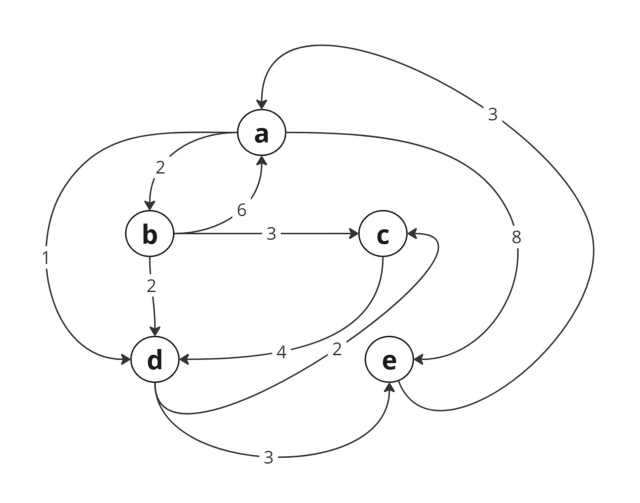

In [12]:
import matplotlib.pyplot as plt
# Plot the graph image from the file
img = plt.imread('./Algo Assignment 5 Q3 part a.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

# Question 03 : b Implementation of Floyd Warshall Algorithm

In [2]:
def floyd_warshall_with_path(W):
    n = len(W)
    D = [row[:] for row in W]
    P = [[None if W[i][j] == float('inf') else i for j in range(n)] for i in range(n)]
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if D[i][k] + D[k][j] < D[i][j]:
                    D[i][j] = D[i][k] + D[k][j]
                    P[i][j] = P[k][j]
    # Check for negative cycles
    for i in range(n):
        if D[i][i] < 0:
            print("Graph contains a negative-weight cycle")
            return None, None
    return D, P

def reconstruct_path(P, i, j):
    path = []
    if P[i][j] is None:
        return path
    path.append(j)
    while i != j:
        j = P[i][j]
        path.append(j)
    path.reverse()
    return path

if __name__ == "__main__":
    # W = [
    #     [0, 3, 8, float('inf'), -4],
    #     [float('inf'), 0, float('inf'), 1, 7],
    #     [float('inf'), 4, 0, float('inf'), float('inf')],
    #     [2, float('inf'), -5, 0, float('inf')],
    #     [float('inf'), float('inf'), float('inf'), 6, 0]
    # ]
    INF = float('inf')
    # graph = [[0, INF, 3, INF],
    #         [2, 0, INF, INF],
    #         [INF, 7, 0,   1],
    #         [6, INF, INF, 0]
    #         ]
    graph = [
        [0, 2, INF, 1, 8],
        [6, 0, 3 , 2, INF],
        [INF, INF, 0, 4, INF],
        [INF, INF, 2, 0, 3],
        [3, INF, INF, INF, 0]
            ]
    D, P = floyd_warshall_with_path(W = graph)
    if D is not None:
        print("Shortest path distance matrix D:")
        for row in D:
            print(row)
        # # Example: Reconstruct the path from vertex 0 to vertex 2
        # i, j = 0, 2
        # path = reconstruct_path(P, i, j)
        # print(f"Shortest path from {i} to {j}: {path}")


Shortest path distance matrix D:
[0, 2, 3, 1, 4]
[6, 0, 3, 2, 5]
[10, 12, 0, 4, 7]
[6, 8, 2, 0, 3]
[3, 5, 6, 4, 0]
